In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

train_csv = pd.read_csv("/content/drive/MyDrive/thesis/FracAtlas/FracAtlas/Utilities/Fracture Split/train.csv")
test_csv = pd.read_csv("/content/drive/MyDrive/thesis/FracAtlas/FracAtlas/Utilities/Fracture Split/test.csv")
valid_csv = pd.read_csv("/content/drive/MyDrive/thesis/FracAtlas/FracAtlas/Utilities/Fracture Split/valid.csv")

In [ ]:
train_csv

,image_id
0,IMG0000019.jpg
1,IMG0000025.jpg
2,IMG0000044.jpg
3,IMG0000057.jpg
4,IMG0000058.jpg
...,...
569,IMG0003267.jpg
570,IMG0003279.jpg
571,IMG0003280.jpg
572,IMG0003293.jpg


In [ ]:
test_csv

,image_id
0,IMG0003297.jpg
1,IMG0003298.jpg
2,IMG0003301.jpg
3,IMG0003308.jpg
4,IMG0003309.jpg
...,...
56,IMG0003686.jpg
57,IMG0003703.jpg
58,IMG0003704.jpg
59,IMG0003712.jpg


In [ ]:
valid_csv

,image_id
0,IMG0003733.jpg
1,IMG0003734.jpg
2,IMG0003766.jpg
3,IMG0003767.jpg
4,IMG0003770.jpg
...,...
77,IMG0004369.jpg
78,IMG0004370.jpg
79,IMG0004374.jpg
80,IMG0004375.jpg


In [ ]:
# Import necessary libraries.
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
#!pip3 install keras

In [ ]:
!pip3 show keras

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [ ]:
# Check Tensorflow and Keras version from your system.

print('TensorFlow version is '+tf.__version__)

TensorFlow version is 2.15.0


In [ ]:
#pip install keras

In [ ]:
#pip install tensorflow

In [ ]:
#pip install --upgrade keras tensorflow

**Creating** **Training** **Dataset**

In [ ]:
# Check and display the number of images in train-dataset.
train_image_data_dir = "/content/drive/MyDrive/thesis/FracAtlas/train-img/train-img/train"
train_image_data_dir = pathlib.Path(train_image_data_dir)
train_image_count = len(list(train_image_data_dir.glob('*/*.jpg')))
train_image_count_fractured = len(list(train_image_data_dir.glob('Fractured/*')))
train_image_count_non_fractured = len(list(train_image_data_dir.glob('Non_fractured/*')))

print("Total = "+str(train_image_count))
print("fractured = "+str(train_image_count_fractured))
print("non-fractured = "+str(train_image_count_non_fractured))


Total = 3267
fractured = 574
non-fractured = 2693


In [ ]:
from struct import unpack
from tqdm import tqdm
import os


marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}


class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()

    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]
            if len(data)==0:
                break

#removing corrupt images from Non_fractured images
bads = []

for img in tqdm(list(train_image_data_dir.glob('Non_fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/FracAtlas/train-img/train/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/FracAtlas/train-img/train/",name))
    print(name)

#removing corrupt images from Fractured images
bads = []

for img in tqdm(list(train_image_data_dir.glob('Fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/FracAtlas/train-img/train/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/FracAtlas/train-img/train/",name))
    print(name)

100%|██████████| 574/574 [00:06<00:00, 89.84it/s] 


**Creating** **validation** **Dataset**

In [ ]:
# Check and display the number of images in valid-dataset.
valid_image_data_dir = "/content/drive/MyDrive/thesis/FracAtlas/valid-img/valid-img/valid"
valid_image_data_dir = pathlib.Path(valid_image_data_dir)
valid_image_count = len(list(valid_image_data_dir.glob('*/*.jpg')))
valid_image_count_fractured = len(list(valid_image_data_dir.glob('Fractured/*')))
Valid_image_count_non_fractured = len(list(valid_image_data_dir.glob('Non_fractured/*')))

print("Total = "+str(valid_image_count))
print("fractured = "+str(valid_image_count_fractured))
print("non-fractured = "+str(Valid_image_count_non_fractured))

Total = 469
fractured = 82
non-fractured = 387


In [ ]:
from struct import unpack
from tqdm import tqdm
import os


marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}


class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()

    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]
            if len(data)==0:
                break

#removing corrupt images from Non_fractured images
bads = []

for img in tqdm(list(valid_image_data_dir.glob('Non_fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/FracAtlas/valid-img/valid/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/FracAtlas/valid-img/valid/",name))
    print(name)

#removing corrupt images from Fractured images
bads = []

for img in tqdm(list(valid_image_data_dir.glob('Fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/FracAtlas/valid-img/valid/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/FracAtlas/valid-img/valid/",name))
    print(name)

100%|██████████| 82/82 [00:31<00:00,  2.59it/s]


**Creating** **Testing** **Dataset**

In [ ]:
# Check and display the number of images in test-dataset.
test_image_data_dir = "/content/drive/MyDrive/thesis/FracAtlas/test-img/test-img/test"
test_image_data_dir = pathlib.Path(test_image_data_dir)
test_image_count = len(list(test_image_data_dir.glob('*/*.jpg')))
test_image_count_fractured = len(list(test_image_data_dir.glob('Fractured/*')))
test_image_count_non_fractured = len(list(test_image_data_dir.glob('Non_fractured/*')))

print("Total = "+str(test_image_count))
print("fractured = "+str(test_image_count_fractured))
print("non-fractured = "+str(test_image_count_non_fractured))


Total = 357
fractured = 61
non-fractured = 296


In [ ]:
from struct import unpack
from tqdm import tqdm
import os


marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}


class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()

    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]
            if len(data)==0:
                break

#removing corrupt images from Non_fractured images
bads = []

for img in tqdm(list(test_image_data_dir.glob('Non_fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/FracAtlas/test-img/test/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/FracAtlas/test-img/test/",name))
    print(name)

#removing corrupt images from Fractured images
bads = []

for img in tqdm(list(test_image_data_dir.glob('Fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/FracAtlas/test-img/test/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/FracAtlas/test-img/test/",name))
    print(name)

100%|██████████| 61/61 [00:24<00:00,  2.44it/s]


**Defining** **Image** **Size**

In [ ]:
# Define the basic parameter, e.g., Batch Size, Image Size.
batch_size = 32 #refers to the number of training examples utilize in one iteration
img_height = 224
img_width = 224

**Training** **Dataset**

In [ ]:
# Define to use 100% of the images for training.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_image_data_dir,
  #validation_split=0.2,
  #subset="training",
  seed=123,
  image_size=(img_height, img_width),
  crop_to_aspect_ratio=True,
  batch_size=batch_size)

Found 3267 files belonging to 2 classes.


In [ ]:
# Display the name of classes.
class_names = train_ds.class_names
print(class_names)

['Fractured', 'Non_fractured']


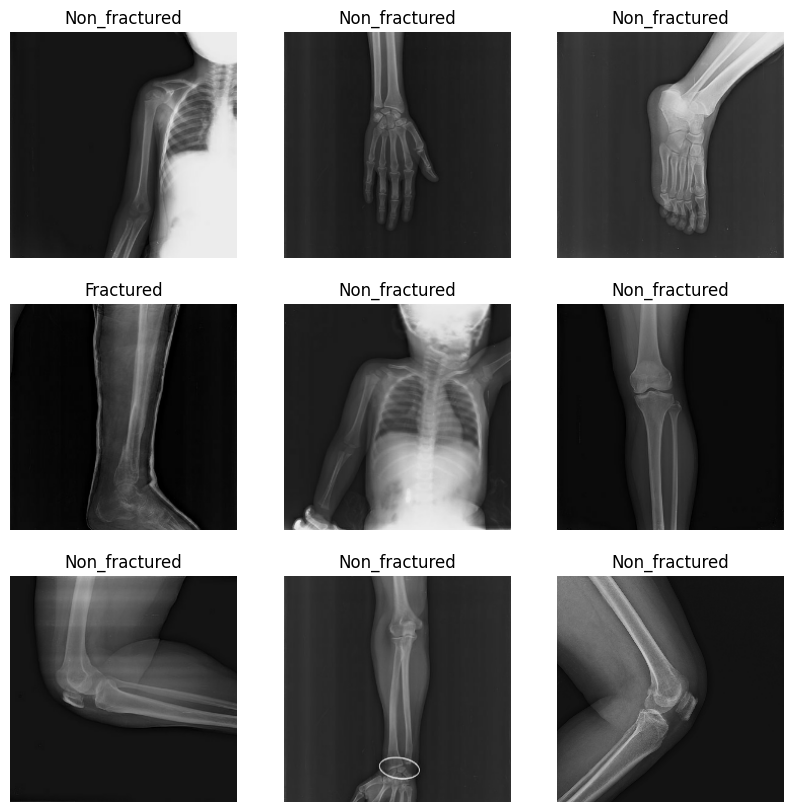

In [ ]:
# Display some sample images from the training images dataset.
plt.figure(figsize=(10, 10))
if not train_ds:
  print("The train_ds dataset is empty.")
else:
  for images, labels in train_ds.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


**Validation** **Dataset**

In [ ]:
# Define to use 100% of the images for validation.
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  valid_image_data_dir,
  #validation_split=0.2,
  #subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  crop_to_aspect_ratio=True,
  batch_size=batch_size)

Found 469 files belonging to 2 classes.


In [ ]:
# Display the name of classes.
class_names = val_ds.class_names
print(class_names)

['Fractured', 'Non_fractured']


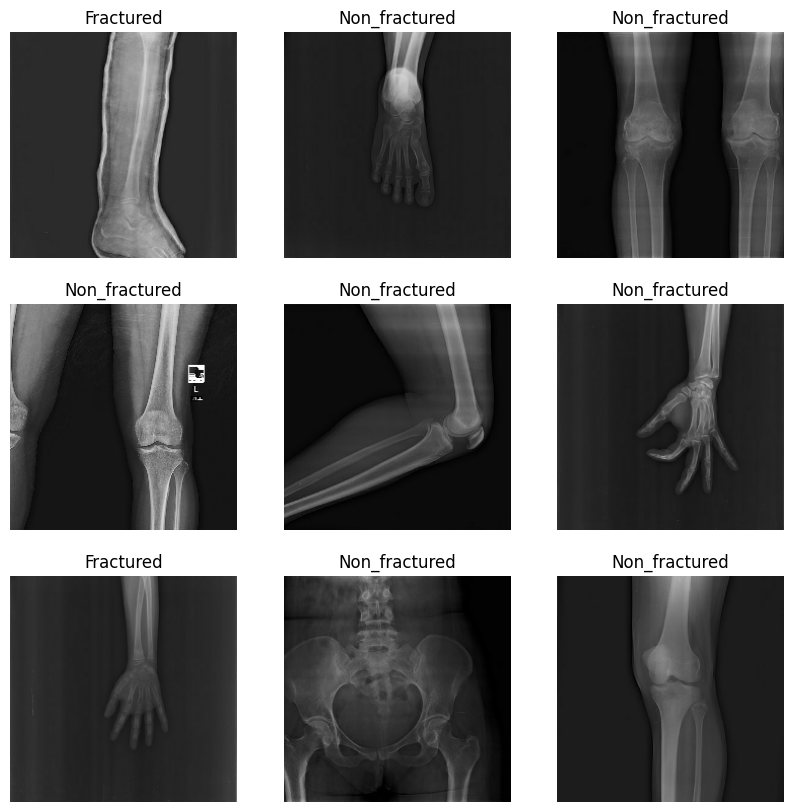

In [ ]:
# Display some sample images from the validation images dataset.
plt.figure(figsize=(10, 10))
if not val_ds:
  print("The val_ds dataset is empty.")
else:
  for images, labels in val_ds.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")

In [ ]:
for image_batch, labels_batch in val_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


**Testing** **Dataset**

In [ ]:
# Define to use 100% of the images for validation.
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_image_data_dir,
  #validation_split=0.2,
  #subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  crop_to_aspect_ratio=True,
  batch_size=batch_size)

Found 357 files belonging to 2 classes.


In [ ]:
# Display the name of classes.
class_names = test_ds.class_names
print(class_names)

['Fractured', 'Non_fractured']


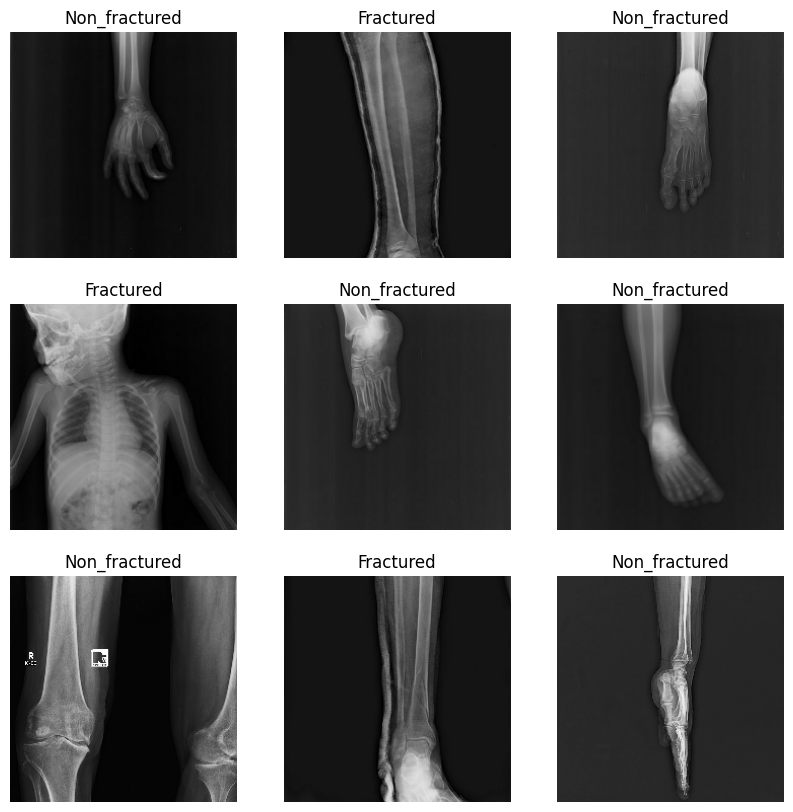

In [ ]:
# Display some sample images from the test_ds images dataset.
plt.figure(figsize=(10, 10))
if not test_ds:
  print("The test_ds dataset is empty.")
else:
  for images, labels in test_ds.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")

In [ ]:
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


**Configure** **the** **dataset** **for** **performance**

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
from tensorflow.keras.layers import Conv2D

In [ ]:
from keras.layers import Conv2D

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


In [ ]:
from keras.layers import AveragePooling2D

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import gzip
import os

import numpy as np

from tensorflow.python.keras.utils.data_utils import get_file
from tensorflow.python.util.tf_export import keras_export

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, Activation
from tensorflow.keras.layers import BatchNormalization, concatenate
from tensorflow.keras import regularizers, initializers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import get_file

In [ ]:
#!pip install tensorflow-addons

In [ ]:
precision_m = tf.keras.metrics.Precision()

In [ ]:
import numpy as np
import tensorflow as tf
from keras import backend as K

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall_keras = true_positives / (possible_positives + K.epsilon())
    return recall_keras

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_keras = true_positives / (predicted_positives + K.epsilon())
    return precision_keras

def specificity(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    return tn / (tn + fp + K.epsilon())

def negative_predictive_value(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))
    return tn / (tn + fn + K.epsilon())

def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))



In [ ]:
'''
Copyright 2017 TensorFlow Authors and Kent Sommer
Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at
   http://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
'''
import numpy as np


# Sys
import warnings
# Keras Core
# from keras.layers.convolutional import MaxPooling2D, Convolution2D, AveragePooling2D
from keras.layers import Input, Dropout, Dense, Flatten, Activation
from tensorflow.keras.layers import BatchNormalization
from keras.layers import concatenate
from keras import regularizers
from keras import initializers
from keras.models import Model
# Backend
from keras import backend as K
from keras.utils import get_file


#########################################################################################
# Implements the Inception Network v4 (http://arxiv.org/pdf/1602.07261v1.pdf) in Keras. #
#########################################################################################

WEIGHTS_PATH = 'https://github.com/kentsommer/keras-inceptionV4/releases/download/2.1/inception-v4_weights_tf_dim_ordering_tf_kernels.h5'
WEIGHTS_PATH_NO_TOP = 'https://github.com/kentsommer/keras-inceptionV4/releases/download/2.1/inception-v4_weights_tf_dim_ordering_tf_kernels_notop.h5'


def preprocess_input(x):
    x = np.divide(x, 255.0)
    x = np.subtract(x, 0.5)
    x = np.multiply(x, 2.0)
    return x


def conv2d_bn(x, nb_filter, num_row, num_col,
              padding='same', strides=(1, 1), use_bias=False):
    """
    Utility function to apply conv + BN.
    (Slightly modified from https://github.com/fchollet/keras/blob/master/keras/applications/inception_v3.py)
    """
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1
    x = Conv2D(nb_filter, (num_row, num_col),
                      strides=strides,
                      padding=padding,
                      use_bias=use_bias,
                      kernel_regularizer=regularizers.l2(0.00004),
                      kernel_initializer=initializers.VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None))(x)
    x = BatchNormalization(axis=channel_axis, momentum=0.9997, scale=False)(x)
    x = Activation('relu')(x)
    return x


def block_inception_a(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

    branch_0 = conv2d_bn(input, 96, 1, 1)

    branch_1 = conv2d_bn(input, 64, 1, 1)
    branch_1 = conv2d_bn(branch_1, 96, 3, 3)

    branch_2 = conv2d_bn(input, 64, 1, 1)
    branch_2 = conv2d_bn(branch_2, 96, 3, 3)
    branch_2 = conv2d_bn(branch_2, 96, 3, 3)

    branch_3 = AveragePooling2D((3,3), strides=(1,1), padding='same')(input)
    branch_3 = conv2d_bn(branch_3, 96, 1, 1)

    x = concatenate([branch_0, branch_1, branch_2, branch_3], axis=channel_axis)
    return x


def block_reduction_a(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

    branch_0 = conv2d_bn(input, 384, 3, 3, strides=(2,2), padding='valid')

    branch_1 = conv2d_bn(input, 192, 1, 1)
    branch_1 = conv2d_bn(branch_1, 224, 3, 3)
    branch_1 = conv2d_bn(branch_1, 256, 3, 3, strides=(2,2), padding='valid')

    branch_2 = MaxPooling2D((3,3), strides=(2,2), padding='valid')(input)

    x = concatenate([branch_0, branch_1, branch_2], axis=channel_axis)
    return x


def block_inception_b(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

    branch_0 = conv2d_bn(input, 384, 1, 1)

    branch_1 = conv2d_bn(input, 192, 1, 1)
    branch_1 = conv2d_bn(branch_1, 224, 1, 7)
    branch_1 = conv2d_bn(branch_1, 256, 7, 1)

    branch_2 = conv2d_bn(input, 192, 1, 1)
    branch_2 = conv2d_bn(branch_2, 192, 7, 1)
    branch_2 = conv2d_bn(branch_2, 224, 1, 7)
    branch_2 = conv2d_bn(branch_2, 224, 7, 1)
    branch_2 = conv2d_bn(branch_2, 256, 1, 7)

    branch_3 = AveragePooling2D((3,3), strides=(1,1), padding='same')(input)
    branch_3 = conv2d_bn(branch_3, 128, 1, 1)

    x = concatenate([branch_0, branch_1, branch_2, branch_3], axis=channel_axis)
    return x


def block_reduction_b(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

    branch_0 = conv2d_bn(input, 192, 1, 1)
    branch_0 = conv2d_bn(branch_0, 192, 3, 3, strides=(2, 2), padding='valid')

    branch_1 = conv2d_bn(input, 256, 1, 1)
    branch_1 = conv2d_bn(branch_1, 256, 1, 7)
    branch_1 = conv2d_bn(branch_1, 320, 7, 1)
    branch_1 = conv2d_bn(branch_1, 320, 3, 3, strides=(2,2), padding='valid')

    branch_2 = MaxPooling2D((3, 3), strides=(2, 2), padding='valid')(input)

    x = concatenate([branch_0, branch_1, branch_2], axis=channel_axis)
    return x


def block_inception_c(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

    branch_0 = conv2d_bn(input, 256, 1, 1)

    branch_1 = conv2d_bn(input, 384, 1, 1)
    branch_10 = conv2d_bn(branch_1, 256, 1, 3)
    branch_11 = conv2d_bn(branch_1, 256, 3, 1)
    branch_1 = concatenate([branch_10, branch_11], axis=channel_axis)


    branch_2 = conv2d_bn(input, 384, 1, 1)
    branch_2 = conv2d_bn(branch_2, 448, 3, 1)
    branch_2 = conv2d_bn(branch_2, 512, 1, 3)
    branch_20 = conv2d_bn(branch_2, 256, 1, 3)
    branch_21 = conv2d_bn(branch_2, 256, 3, 1)
    branch_2 = concatenate([branch_20, branch_21], axis=channel_axis)

    branch_3 = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(input)
    branch_3 = conv2d_bn(branch_3, 256, 1, 1)

    x = concatenate([branch_0, branch_1, branch_2, branch_3], axis=channel_axis)
    return x


def inception_v4_base(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

    # Input Shape is 299 x 299 x 3 (th) or 3 x 299 x 299 (th)
    net = conv2d_bn(input, 32, 3, 3, strides=(2,2), padding='valid')
    net = conv2d_bn(net, 32, 3, 3, padding='valid')
    net = conv2d_bn(net, 64, 3, 3)

    branch_0 = MaxPooling2D((3,3), strides=(2,2), padding='valid')(net)

    branch_1 = conv2d_bn(net, 96, 3, 3, strides=(2,2), padding='valid')

    net = concatenate([branch_0, branch_1], axis=channel_axis)

    branch_0 = conv2d_bn(net, 64, 1, 1)
    branch_0 = conv2d_bn(branch_0, 96, 3, 3, padding='valid')

    branch_1 = conv2d_bn(net, 64, 1, 1)
    branch_1 = conv2d_bn(branch_1, 64, 1, 7)
    branch_1 = conv2d_bn(branch_1, 64, 7, 1)
    branch_1 = conv2d_bn(branch_1, 96, 3, 3, padding='valid')

    net = concatenate([branch_0, branch_1], axis=channel_axis)

    branch_0 = conv2d_bn(net, 192, 3, 3, strides=(2,2), padding='valid')
    branch_1 = MaxPooling2D((3,3), strides=(2,2), padding='valid')(net)

    net = concatenate([branch_0, branch_1], axis=channel_axis)

    # 35 x 35 x 384
    # 4 x Inception-A blocks
    for idx in range(4):
    	net = block_inception_a(net)

    # 35 x 35 x 384
    # Reduction-A block
    net = block_reduction_a(net)

    # 17 x 17 x 1024
    # 7 x Inception-B blocks
    for idx in range(7):
    	net = block_inception_b(net)

    # 17 x 17 x 1024
    # Reduction-B block
    net = block_reduction_b(net)

    # 8 x 8 x 1536
    # 3 x Inception-C blocks
    for idx in range(3):
    	net = block_inception_c(net)

    return net
def inception_v4(num_classes, dropout_keep_prob, weights, include_top):
    '''
    Creates the inception v4 network
    Args:
    	num_classes: number of classes
    	dropout_keep_prob: float, the fraction to keep before final layer.

    Returns:
    	logits: the logits outputs of the model.
    '''

    # Input Shape is 299 x 299 x 3 (tf) or 3 x 299 x 299 (th)
    if K.image_data_format() == 'channels_first':
        inputs = Input((3, 224, 224))
    else:
        inputs = Input((224, 224, 3))

    # Make inception base
    x = inception_v4_base(inputs)

    # Final pooling and prediction
    if include_top:
        # 1 x 1 x 1536
        x = AveragePooling2D((5, 5), padding='valid')(x)
        x = Dropout(dropout_keep_prob)(x)
        x = Flatten()(x)
        # 1536
        x = Dense(units=num_classes, activation='softmax')(x)

    model = Model(inputs, x, name='inception_v4')

    # Load weights if provided
    if weights is not None:
        model.load_weights(weights, by_name=True)

    return model

def create_model(num_classes=2, dropout_prob=0.2, weights=None, include_top=True):
    return inception_v4(num_classes, dropout_prob, weights, include_top)

# Example usage:
# model = create_model(num_classes=10, dropout_prob=0.5, weights=None, include_top=True)


In [ ]:
model = create_model(num_classes=2,include_top=True)

In [ ]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', f1, precision, recall])

In [ ]:
# Display the model with Dropout.
model.summary()

Model: "inception_v4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalizati

In [ ]:
# Start model training with Dropout.
epochs = 100
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/100
103/103 [==============================] - 58s 558ms/step - loss: 2.3338 - accuracy: 0.8277 - f1: 0.9012 - precision: 0.8229 - recall: 1.0000 - val_loss: 81252624.0000 - val_accuracy: 0.8252 - val_f1: 0.9051 - val_precision: 0.8292 - val_recall: 1.0000
Epoch 2/100
103/103 [==============================] - 57s 557ms/step - loss: 2.1857 - accuracy: 0.8387 - f1: 0.9012 - precision: 0.8229 - recall: 1.0000 - val_loss: 21098308.0000 - val_accuracy: 0.1748 - val_f1: 0.9051 - val_precision: 0.8292 - val_recall: 1.0000
Epoch 3/100
103/103 [==============================] - 57s 557ms/step - loss: 2.0582 - accuracy: 0.8476 - f1: 0.9012 - precision: 0.8229 - recall: 1.0000 - val_loss: 954934.2500 - val_accuracy: 0.8252 - val_f1: 0.9051 - val_precision: 0.8292 - val_recall: 1.0000
Epoch 4/100
103/103 [==============================] - 57s 558ms/step - loss: 1.9363 - accuracy: 0.8607 - f1: 0.9012 - precision: 0.8229 - recall: 1.0000 - val_loss: 66848.5000 - val_accuracy: 0.1748 - val_f